In [1]:
import pandas as pd
import numpy as np
from sklearn import tree ,preprocessing
import matplotlib.pyplot as plt

In [2]:
titanic_train = pd.read_csv("train.csv")

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:>

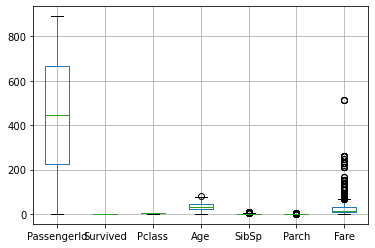

In [5]:
titanic_train.boxplot()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

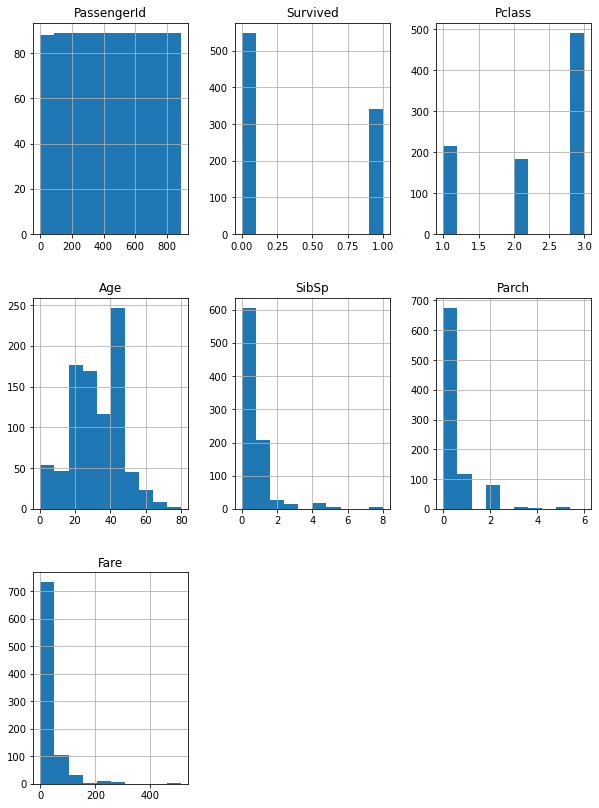

In [6]:
titanic_train.hist(figsize =(10,14))

In [7]:
titanic_train["Age"].mean()

32.69985376827896

In [8]:
new_age_war = np.where(titanic_train["Age"].isnull(),32,titanic_train["Age"])

In [9]:
titanic_train["Age"] = new_age_war

In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
enoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

In [12]:
tree_model = tree.DecisionTreeClassifier()

In [13]:
tree_model = tree_model.fit(X = pd.DataFrame(enoded_sex),y=titanic_train["Survived"])

In [14]:
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
with open("Dtree1.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names=["Sex"],out_file=f)

In [16]:
predictors = pd.DataFrame([enoded_sex,titanic_train["Age"]]).T

In [17]:
tree_model = tree_model.fit(X = predictors,y=titanic_train["Survived"])

In [18]:
with open("Dtree_sex_age.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names=["Sex","Age"],out_file=f)

In [19]:
predictors = pd.DataFrame([enoded_sex,titanic_train["Age"],titanic_train["Fare"]]).T

In [20]:
tree_model = tree_model.fit(X = predictors,y=titanic_train["Survived"])

In [21]:
with open("Dtree_sex_age_fare.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names=["Sex","Age","Fare"],out_file=f)

In [22]:
tree_model.score(X=predictors,y =titanic_train["Survived"])

0.9763779527559056

In [23]:
titanic_test = pd.read_csv("test.csv")

In [24]:
new_age_war = np.where(titanic_test["Age"].isnull(),32,titanic_test["Age"])

In [25]:
titanic_test["Age"] = new_age_war

In [26]:
enoded_sex_test = label_encoder.fit_transform(titanic_test["Sex"])

In [27]:
test_features = pd.DataFrame([enoded_sex_test,titanic_test["Age"],titanic_test["Fare"]]).T

In [28]:
test_predict = tree_model.predict(X= test_features)

In [29]:
predicted_output = pd.DataFrame({"Passenger Id":titanic_test["PassengerId"],"Survived":test_predict})

In [30]:
predicted_output.to_csv("Output.csv",index = False)

In [31]:
###Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
label_encoder = preprocessing.LabelEncoder()

In [35]:
titanic_train["Sex"] = label_encoder.fit_transform(titanic_train["Sex"])

In [36]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features=2,oob_score=True)

In [37]:
features = ["Sex","Age","Fare"]

In [38]:
rf_model.fit(X = titanic_train[features], y = titanic_train["Survived"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
print("oob _ score",rf_model.oob_score_)

oob _ score 0.7907761529808774


In [40]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Sex 0.280126337321505
Age 0.2889823938171109
Fare 0.43089126886138407


In [41]:
from sklearn.tree import export_text
r = export_text(tree_model , feature_names=features)

In [43]:
print(r)

|--- Sex <= 0.50
|   |--- Fare <= 48.20
|   |   |--- Fare <= 27.82
|   |   |   |--- Fare <= 25.70
|   |   |   |   |--- Fare <= 24.07
|   |   |   |   |   |--- Fare <= 10.48
|   |   |   |   |   |   |--- Fare <= 8.04
|   |   |   |   |   |   |   |--- Fare <= 6.99
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Fare >  6.99
|   |   |   |   |   |   |   |   |--- Fare <= 7.52
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Fare >  7.52
|   |   |   |   |   |   |   |   |   |--- Age <= 14.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  14.50
|   |   |   |   |   |   |   |   |   |   |--- Age <= 17.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Age >  17.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |--- Fare >  8.04
|   |   |   |   |   |   |   |--- Age <= 19